## Dependencies and starter code

In [333]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [336]:
# Examine the data.  This is information about each mouse in the study
mouse_metadata.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [64]:
# This is tumor volume data collected on each mouse a sa function of time
study_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [66]:
# Combine the data into a single dataset
result = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

In [347]:
# Combined data allows maping the drug regimen to data about tumor volume
result.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [344]:
# Determine the number of data points for each drug regimen
result["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [345]:
# Group the results by drug regimen
result_by_regimen = result.groupby("Drug Regimen")

In [346]:
# Gather statistical data for each drug regimen from groupby 
mean_tumor_volume_by_regimen = result_by_regimen["Tumor Volume (mm3)"].mean()
median_tumor_volume_by_regimen = result_by_regimen["Tumor Volume (mm3)"].median()
variance_tumor_volume_by_regimen = result_by_regimen["Tumor Volume (mm3)"].var()
stddev_tumor_volume_by_regimen = result_by_regimen["Tumor Volume (mm3)"].std()
sem_tumor_volume_by_regimen = result_by_regimen["Tumor Volume (mm3)"].sem()

## Summary statistics

In [348]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# Construct a data from from series of statistical data avoe
regimen_summary = pd.DataFrame( {"Mean":mean_tumor_volume_by_regimen,"Median":median_tumor_volume_by_regimen,
                                "Variance":variance_tumor_volume_by_regimen,"Std dev":stddev_tumor_volume_by_regimen,
                                "SEM":sem_tumor_volume_by_regimen} )
# Sort by SEM to determine the most effecive regimen
regimen_summary.sort_values("SEM")

,Mean,Median,Variance,Std dev,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [267]:
# Store the values of the most effective regimens
most_effective_drugs = regimen_summary.sort_values("SEM").index.tolist()[0:4]

## Bar plots

Text(0, 0.5, 'Data Points')

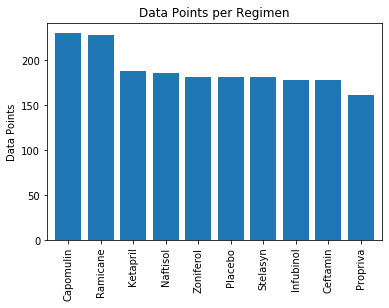

In [343]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pdplot = result["Drug Regimen"].value_counts().plot( kind="bar", width=.8, title="Data Points per Regimen",                                                     )
pdplot.set_ylabel('Data Points')

Text(0, 0.5, 'Data Points')

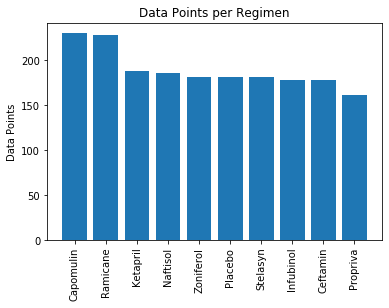

In [349]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(result["Drug Regimen"].value_counts().index, result["Drug Regimen"].value_counts(), width=.8)
plt.xticks(rotation =90)
plt.title("Data Points per Regimen")
plt.ylabel("Data Points")

## Pie plots

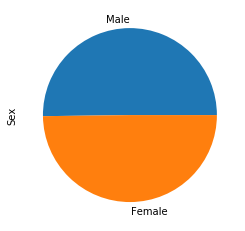

In [351]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata['Sex'].value_counts().plot(kind="pie" )

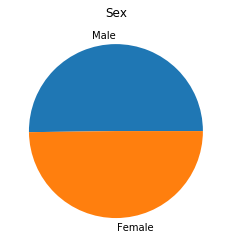

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_metadata['Sex'].value_counts(), labels=["Male","Female"])
plt.title("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [352]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers

In [355]:
# Create groupby by mouse to create a series that maps each mouse to its max timepoint
results_by_mouse = result.groupby("Mouse ID")
max_timepoint_by_mouse = results_by_mouse["Timepoint"].max()

pandas.core.series.Series

In [354]:
# Iterate over the data frame, using the previous series to only record the data from the max timepoint into a new dictionary
max_dict = {}
for index, row in result.iterrows():
    if row["Drug Regimen"] in most_effective_drugs:
        if row['Timepoint'] == max_timepoint_by_mouse[ row['Mouse ID']]:
            if row["Drug Regimen"] not in max_dict:
                max_dict[row["Drug Regimen"]] = [row]
            else:
                max_dict[row["Drug Regimen"]].append( row )

In [358]:
# Iterate over over dict created above, extracting only tumor volume into anew dictionary
final_tumor_size = {}
for key in max_dict:
    if key not in final_tumor_size:
        final_tumor_size[key] = []
        for item in max_dict[key]:
            final_tumor_size[key].append( item["Tumor Volume (mm3)"] )
    else:
        for item in max_dict[key]:
            final_tumor_size[key].append( item["Tumor Volume (mm3)"] )

In [359]:
# New dict has drug regimen mapped to a list of final tumor volumes for each mouse
final_tumor_size

{'Ramicane': [22.05012627,
  29.12847181,
  30.27623175,
  30.56462509,
  30.63869575,
  31.56046955,
  31.09533505,
  33.39765251,
  32.97852192,
  33.56240217,
  36.13485243,
  38.81036633,
  37.22565033,
  36.37451039,
  36.56165229,
  37.31123552,
  38.34200823,
  38.407618299999996,
  40.65900627,
  40.66771292,
  45.22086888,
  43.04754260000001,
  43.41938077,
  43.16637266,
  44.18345092],
 'Capomulin': [23.34359787,
  28.48403281,
  28.43096411,
  30.48598484,
  31.02392294,
  31.896238399999998,
  32.37735684,
  33.32909778,
  34.45529799,
  37.31184577,
  36.04104736,
  37.07402422,
  38.84687569,
  38.93963263,
  38.98287774,
  38.75326548,
  38.125164399999996,
  39.95234669,
  40.65812366,
  40.1592203,
  40.72857787,
  41.48300765,
  41.58152074,
  47.68596303,
  46.53920617],
 'Infubinol': [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.321345799999996,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887

In [364]:
# Create a data from from the dictonary above w/ drug regimen mapped to final tumor volumes
tumor_size_by_drug = pd.DataFrame( final_tumor_size )
tumor_size_by_drug.head(10)

,Ramicane,Capomulin,Infubinol,Ceftamin
0,22.050126,23.343598,67.973419,62.999356
1,29.128472,28.484033,65.525743,45.000000
2,30.276232,28.430964,57.031862,56.057749
3,30.564625,30.485985,66.083066,55.742829
4,30.638696,31.023923,72.226731,48.722078
5,31.560470,31.896238,36.321346,47.784682
6,31.095335,32.377357,60.969711,61.849023
7,33.397653,33.329098,62.435404,68.923185
8,32.978522,34.455298,60.918767,67.748662
9,33.562402,37.311846,67.289621,57.918381


In [365]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers
# If the data is in a dataframe, we use pandas to give quartile calculations

In [369]:
# Sorted value for Ramicane
print("Sorted final tumor volumes for Ramicane")
print( tumor_size_by_drug["Ramicane"].sort_values() )

#Calculate the quartiles and IQR for Ramicane
quartiles_ramicane = tumor_size_by_drug["Ramicane"].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

print("For final tumor volumes with Ramicane drug regimen:")
print(f"The lower quartile is: {lowerq_ramicane}")
print(f"The upper quartile is: {upperq_ramicane}")
print(f"The interquartile range is: {iqr_ramicane}")
print(f"The the median is: {quartiles_ramicane[0.5]} ")

# Calculate the bounds for outliers
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")
print("Ramicane has no outliers")

Sorted final tumor volumes for Ramicane
0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
6     31.095335
5     31.560470
8     32.978522
7     33.397653
9     33.562402
10    36.134852
13    36.374510
14    36.561652
12    37.225650
15    37.311236
16    38.342008
17    38.407618
11    38.810366
18    40.659006
19    40.667713
21    43.047543
23    43.166373
22    43.419381
24    44.183451
20    45.220869
Name: Ramicane, dtype: float64
For final tumor volumes with Ramicane drug regimen:
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has no outliers


In [370]:
# Sorted value for Capomulin
print("Sorted final tumor volumes for Capomulin")
print( tumor_size_by_drug["Capomulin"].sort_values() )

#Calculate the quartiles and IQR for Capomulin
quartiles_capomulin = tumor_size_by_drug["Capomulin"].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

print("For final tumor volumes with Capomulin drug regimen:")
print(f"The lower quartile is: {lowerq_capomulin}")
print(f"The upper quartile is: {upperq_capomulin}")
print(f"The interquartile range is: {iqr_capomulin}")
print(f"The the median is: {quartiles_capomulin[0.5]} ")

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")
print("Capomulin has no outliers")

Sorted final tumor volumes for Capomulin
0     23.343598
2     28.430964
1     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
10    36.041047
11    37.074024
9     37.311846
16    38.125164
15    38.753265
12    38.846876
13    38.939633
14    38.982878
17    39.952347
19    40.159220
18    40.658124
20    40.728578
21    41.483008
22    41.581521
24    46.539206
23    47.685963
Name: Capomulin, dtype: float64
For final tumor volumes with Capomulin drug regimen:
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has no outliers


In [371]:
# Sorted value for Ceftamin
print("Sorted final tumor volumes for Ceftamin")
print( tumor_size_by_drug["Ceftamin"].sort_values() )

#Calculate the quartiles and IQR for Ceftamin
quartiles_ceftamin = tumor_size_by_drug["Ceftamin"].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

print("For final tumor volumes with Ceftamin drug regimen:")
print(f"The lower quartile is: {lowerq_ceftamin}")
print(f"The upper quartile is: {upperq_ceftamin}")
print(f"The interquartile range is: {iqr_ceftamin}")
print(f"The the median is: {quartiles_ceftamin[0.5]} ")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")
print("Ceftamim has no outliers")

Sorted final tumor volumes for Ceftamin
20    45.000000
1     45.000000
18    45.000000
16    45.000000
10    46.784535
5     47.784682
4     48.722078
17    52.925348
3     55.742829
2     56.057749
9     57.918381
13    59.741901
11    59.851956
22    61.386660
14    61.433892
6     61.849023
0     62.999356
15    64.192341
12    64.299830
21    64.634949
24    64.729837
19    67.527482
8     67.748662
23    68.594745
7     68.923185
Name: Ceftamin, dtype: float64
For final tumor volumes with Ceftamin drug regimen:
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamim has no outliers


In [372]:
# Sorted value for Infubinol
print("Sorted final tumor volumes for Infubinol")

#Calculate the quartiles and IQR for Infubinol
print( tumor_size_by_drug["Infubinol"].sort_values() )
quartiles_infubinol = tumor_size_by_drug["Infubinol"].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

print("For final tumor volumes with Infubinol drug regimen:")
print(f"The lower quartile of temperatures is: {lowerq_infubinol}")
print(f"The upper quartile of temperatures is: {upperq_infubinol}")
print(f"The interquartile range of temperatures is: {iqr_infubinol}")
print(f"The the median of temperatures is: {quartiles_infubinol[0.5]} ")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")
print("Infubinol has outn outlier of 36.321346")

Sorted final tumor volumes for Infubinol
5     36.321346
15    45.699331
18    46.250112
12    47.010364
21    50.005138
20    51.542431
19    54.048608
16    54.656549
14    55.629428
17    55.650681
2     57.031862
22    58.268442
13    60.165180
8     60.918767
6     60.969711
11    62.117279
7     62.435404
24    62.754451
1     65.525743
3     66.083066
10    66.196912
9     67.289621
23    67.685569
0     67.973419
4     72.226731
Name: Infubinol, dtype: float64
For final tumor volumes with Infubinol drug regimen:
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol has outn outlier of 36.321346


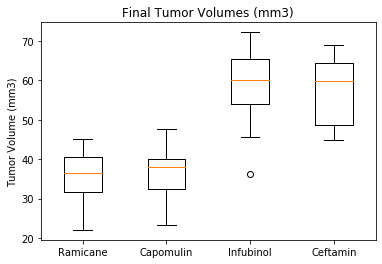

In [373]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes (mm3)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_tumor_size.values())
ax1.set_xticklabels(final_tumor_size.keys())
plt.show()

## Line and scatter plots

In [374]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Create data frame with data from only one mouse on Capomulin regimen
mouse_x401_weight_v_tumor_vol = result[result["Mouse ID"]=="x401"][["Tumor Volume (mm3)","Timepoint"]]

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabam'

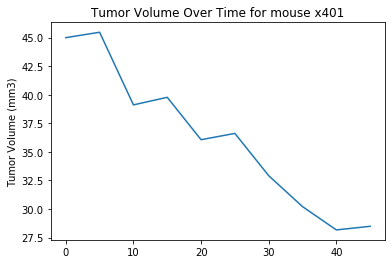

In [377]:
# Create line plot for mouse x401
plt.plot(mouse_x401_weight_v_tumor_vol["Timepoint"],mouse_x401_weight_v_tumor_vol["Tumor Volume (mm3)"])
plt.title('Tumor Volume Over Time for mouse x401')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabam('Time point')

In [378]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Create a group by of mice on the Capomulin regimen
capomulin_results_by_mouse=result[result["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_weight_v_tumor_vol = capomulin_results_by_mouse[["Weight (g)","Tumor Volume (mm3)"]].mean()

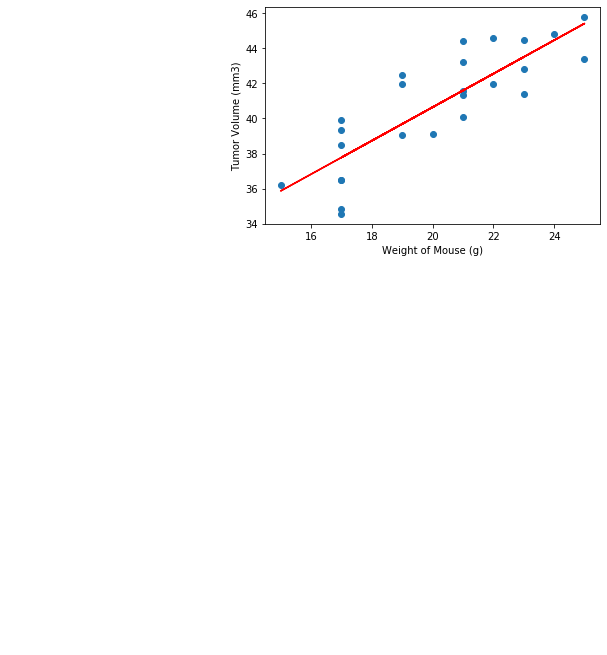

In [379]:
# Create scatter plot with a line regression
x_values = avg_weight_v_tumor_vol["Weight (g)"]
y_values = avg_weight_v_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

In [380]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


# Observations

There is a correlation between tumor volume and mouse weight, which makes sense as the volume of the tumor adds to the weight of the mouse. 

Ramicane and Capomulin have a significantly better final tumor volume, but we haven't done any analysis on the difference between initial tumor size and final tumor size which could have been an informative metric

The groupings for the final tumor volumes for the 4 regimens studies are very tight and without any significant outliers